<a href="https://colab.research.google.com/github/nishantkapps/aiml-projects/blob/main/Featurization_ModelSelection_Tuning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Great Learning / Deakin (MDS) Project Submission**
>**Featurization, Model Selection & Tuning (FMT) Project**<br>
>*Goal : Demonstrate the ability to select features, tune models and choose the best model based on metrics*<br>
>*Domain : Semiconductor Manufacturing Process* <br>
>*Developer : Nishant Killedar*
<hr>

> **CONTEXT:** A complex modern semiconductor manufacturing process is normally under constant surveillance via the monitoring of signals/variables collected from sensors and or process measurement points. However, not all of these signals are equally valuable in a specific monitoring system. The measured signals contain a combination of useful information, irrelevant information as well as noise. <br><br>
Engineers typically have a much larger number of signals than are actually required. If we consider each type of signal as a feature then feature selection may be applied to identify the most relevant signals. The Process Engineers may then use these signals to determine key factors contributing to yield excursions downstream in the process. This will enable an increase in process throughput, decreased time to learning and reduce the per unit production costs. These signals can be used as features to predict the yield type. And by analysing and trying out different combinations of features, essential signals that are impacting the yield type can be identified.<br><br>
<hr>

> **PROJECT OBJECTIVE**: Build a classifier to predict the Pass/Fail yield of a particular process entity and analyse whether all the features are required to build the model or not.

<hr>

In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy import stats
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Math, HTML
display(HTML("<script src='https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.3/"
               "latest.js?config=default'></script>"))
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split, GridSearchCV

<hr>

**Section 1 : Import and understand the data: [5 Marks]**
<li>A. Import ‘signal-data.csv’ as DataFrame. [2 Marks]
<li>B. Print 5 point summary and share at least 2 observations. [3 Marks]

<hr>

In [106]:
signal = pd.read_csv('/content/drive/MyDrive/datasets/fmt/signal-data.csv')

In [107]:
signal.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [108]:
signal.describe().T

,count,mean,std,min,25%,50%,75%,max
0,1561.0,3014.452896,73.621787,2743.2400,2966.260000,3011.4900,3056.6500,3356.3500
1,1560.0,2495.850231,80.407705,2158.7500,2452.247500,2499.4050,2538.8225,2846.4400
2,1553.0,2200.547318,29.513152,2060.6600,2181.044400,2201.0667,2218.0555,2315.2667
3,1553.0,1396.376627,441.691640,0.0000,1081.875800,1285.2144,1591.2235,3715.0417
4,1553.0,4.197013,56.355540,0.6815,1.017700,1.3168,1.5257,1114.5366
...,...,...,...,...,...,...,...,...
586,1566.0,0.021458,0.012358,-0.0169,0.013425,0.0205,0.0276,0.1028
587,1566.0,0.016475,0.008808,0.0032,0.010600,0.0148,0.0203,0.0799
588,1566.0,0.005283,0.002867,0.0010,0.003300,0.0046,0.0064,0.0286
589,1566.0,99.670066,93.891919,0.0000,44.368600,71.9005,114.7497,737.3048


<hr>

> **Inferences**
<li> Converted the 5 point summary to a data table & applied filters

> #1. Filter for all rows with 0 Standard Deviation
> <li> 112 features have 0 value for all rows & can be dropped
> <li> 4 features (5,42, 49, 69) have a constant value for all rows and can be dropped

> #2. Features have different scales and need to be normalized before fitting to a model

> #3. Many features have NaN values which need to be addressed before fitting to a model

> #4. Feature 4 has outliers as the max value is significantly higher than 75% - there are many such features which will need to be addressed before fitting the model

> #5. Many features also have negative values

> #6. There are 589 total features and a target column (Pass/Fail) which seems to have 2 values -1 / 1.

> #7. Also, 75% of the target is -1 which indicates, the data is imbalanced and has more rows of Fail class

<hr>

**Section 2 : Data cleansing: [15 Marks]**
<li>A. Write a for loop which will remove all the features with 20%+ Null values and impute rest with mean of the feature. [5 Marks]
<li>B. Identify and drop the features which are having same value for all the rows. [3 Marks]
<li>C. Drop other features if required using relevant functional knowledge. Clearly justify the same. [2 Marks]
<li>D. Check for multi-collinearity in the data and take necessary action. [3 Marks]
<li>E. Make all relevant modifications on the data using both functional/logical reasoning/assumptions. [2 Marks]

<hr>

In [109]:
cols = signal.columns
rows = signal.shape[0]
shape = signal.shape
sigcln = signal.copy()

In [110]:
print(rows)
print(shape)

1567
(1567, 592)


In [111]:
# Excluding the time & pass/fail column from null value processing
nancols = []
dropcols = []
fullcols = []

for i, col in enumerate(cols[1:-1]):

  nullpct = sigcln[col].isnull().sum()/rows

  if (nullpct > 0.2) :
    dropcols.append(col)

  if (nullpct > 0) and (nullpct < 0.2) :
    nancols.append(col)
    sigcln[col].fillna(int(sigcln[col].mean()), inplace=True)

  if (nullpct == 0) :
    fullcols.append(col)

print('Cols with < 20% null values :', nancols)
print('Cols with > 20% null values :', dropcols)
print('Cols with no null values :', fullcols)

Cols with < 20% null values : ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '118', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '159', '160', '161', '162', '163', '164', '165', '166', '167', '168', '169', '170', '171', '172', '173', '

In [112]:
for col in dropcols :
  sigcln.drop(col, axis=1, inplace=True)

In [113]:
sigcln.shape

(1567, 560)

In [114]:
newcols = sigcln.columns

In [115]:
for i, col in enumerate(newcols[1:-1]):
  nunique = sigcln[col].nunique()
  if (nunique == 1) :
    sigcln.drop(col, axis=1, inplace=True)

In [116]:
sigcln.shape

(1567, 444)

In [117]:
# Time column is not required for analysis, so dropping the column
sigcln.drop(['Time'], axis=1, inplace=True)

<hr>
Check for Multicollinearity
<li> First step is to check correlation & do a simple heatmap
<li> Given, that we have a large number of columns, we can use an alternate statistical method Variance Inflation Factor(VIF)
<li> In VIF method, we pick each feature and regress it against all of the other features. For each regression, the factor is calculated as

In [118]:
Math(r'VIF=\frac{1}{1-R^2}')

<IPython.core.display.Math object>

<li> Where, R-squared is the coefficient of determination in linear regression. Its value lies between 0 and 1.
<hr>

In [119]:
corr = sigcln.corr()

<Axes: >

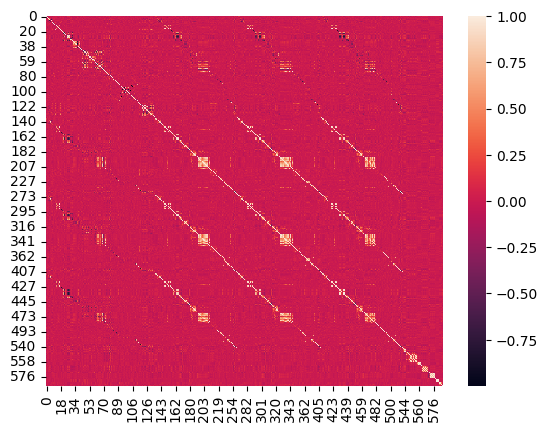

In [120]:
sns.heatmap(corr)

In [121]:
# Function to calculate VIF
def calculate_vif(data):
    vif_df = pd.DataFrame(columns = ['Var', 'Vif'])
    x_var_names = data.columns[:-1]
    for i in range(0, x_var_names.shape[0]):
        y = data[x_var_names[i]]
        x = data[x_var_names.drop([x_var_names[i]])]
        r_squared = sm.OLS(y,x).fit().rsquared
        vif = round(1/(1-r_squared),2)
        vif_df.loc[i] = [x_var_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis = 0, ascending=False, inplace=False)


In [122]:
X=sigcln.drop(['Pass/Fail'],axis=1)

In [123]:
# vifx = calculate_vif(X)

In [124]:
# vifx.to_csv('vifx-signal.csv', encoding='utf-8', index=False)

In [125]:
vifx = pd.read_csv('/content/drive/MyDrive/datasets/fmt/vifx-signal.csv')

In [126]:
dropcols2 = vifx[vifx['Vif']>5]['Var'].to_list()

In [127]:
for col in dropcols2 :
  sigcln.drop(str(col), axis=1, inplace=True)

In [128]:
sigcln.shape

(1567, 35)

In [129]:
newcols2 = sigcln.columns
for col in newcols2:
  vcnt = sigcln[col].value_counts().T
  print(col)
  print(vcnt)

9
-0.0088    10
-0.0108    10
-0.0077     9
 0.0013     9
-0.0027     8
           ..
 0.0286     1
 0.0354     1
 0.0455     1
 0.0248     1
 0.0202     1
Name: 9, Length: 568, dtype: int64
10
-0.0010    12
 0.0039    12
 0.0057    12
 0.0018    12
 0.0031    11
           ..
 0.0131     1
 0.0306     1
 0.0210     1
 0.0113     1
 0.0139     1
Name: 10, Length: 392, dtype: int64
24
 51.75      3
-73.25      3
 115.00     2
-477.25     2
 259.00     2
           ..
-5033.75    1
 4460.50    1
 1503.75    1
 1576.00    1
-425.00     1
Name: 24, Length: 1495, dtype: int64
75
 0.0000    27
 0.0037     8
-0.0078     8
-0.0106     8
-0.0036     7
           ..
-0.0437     1
-0.0425     1
 0.0236     1
-0.0290     1
-0.0183     1
Name: 75, Length: 675, dtype: int64
77
 0.0000    29
-0.0221     7
-0.0134     7
-0.0085     7
-0.0077     7
           ..
 0.0010     1
 0.0265     1
 0.0159     1
-0.0651     1
-0.0550     1
Name: 77, Length: 842, dtype: int64
78
 0.0000    24
-0.0103     6
 0.00

<hr>
From the above, you can see that the following columns have rows with 0 values but these are most likely null values as the range of values is not close to zero. 0 in these columns should be imputed with the mean value so it helps the model

129, 418, 419, 432, 433, 468, 482, 483, 484, 485, 486, 487, 488, 489, 499, 500, 511, 521
<hr>

In [130]:
imputecols = ['129', '418', '419', '432', '433', '468', '482', '483', '484', '485', '486', '487', '488', '489', '499', '500', '511', '521']

In [131]:
for col in imputecols :
  sigcln[col].replace(0, sigcln[col].mean(), inplace=True)

In [132]:
for col in imputecols:
  vcnt = sigcln[col].value_counts().T
  print(col)
  print(vcnt)

129
-0.551045    186
 0.047300     88
-0.141900     71
-0.094600     50
 0.756900     49
            ... 
-3.166000      2
-1.702000      1
-1.204000      1
-1.371000      1
-1.466000      1
Name: 129, Length: 93, dtype: int64
418
320.258904    512
437.988800      2
652.427200      2
307.692300      2
320.000000      2
             ... 
258.115200      1
760.079800      1
438.983700      1
542.586800      1
470.750600      1
Name: 418, Length: 1052, dtype: int64
419
309.061221    712
640.000000      3
800.000000      2
309.000000      2
467.575600      1
             ... 
320.824100      1
959.540900      1
772.413800      1
958.072300      1
356.756800      1
Name: 419, Length: 852, dtype: int64
432
99.367163     57
400.000000     7
99.000000      2
26.361700      1
318.065300     1
              ..
13.721200      1
61.719800      1
30.146400      1
30.190700      1
12.728500      1
Name: 432, Length: 1504, dtype: int64
433
205.518642    187
400.000000      7
5.537900        2
205.000

In [133]:
sigcln.drop(['521'], axis=1, inplace=True)

In [134]:
sigcln.drop(['511', '500', '499'], axis=1, inplace=True)

In [135]:
for col in sigcln.columns:
  vcnt = sigcln[col].value_counts().T
  print(col)
  print(vcnt)

9
-0.0088    10
-0.0108    10
-0.0077     9
 0.0013     9
-0.0027     8
           ..
 0.0286     1
 0.0354     1
 0.0455     1
 0.0248     1
 0.0202     1
Name: 9, Length: 568, dtype: int64
10
-0.0010    12
 0.0039    12
 0.0057    12
 0.0018    12
 0.0031    11
           ..
 0.0131     1
 0.0306     1
 0.0210     1
 0.0113     1
 0.0139     1
Name: 10, Length: 392, dtype: int64
24
 51.75      3
-73.25      3
 115.00     2
-477.25     2
 259.00     2
           ..
-5033.75    1
 4460.50    1
 1503.75    1
 1576.00    1
-425.00     1
Name: 24, Length: 1495, dtype: int64
75
 0.0000    27
 0.0037     8
-0.0078     8
-0.0106     8
-0.0036     7
           ..
-0.0437     1
-0.0425     1
 0.0236     1
-0.0290     1
-0.0183     1
Name: 75, Length: 675, dtype: int64
77
 0.0000    29
-0.0221     7
-0.0134     7
-0.0085     7
-0.0077     7
           ..
 0.0010     1
 0.0265     1
 0.0159     1
-0.0651     1
-0.0550     1
Name: 77, Length: 842, dtype: int64
78
 0.0000    24
-0.0103     6
 0.00

In [136]:
sigcln.shape

(1567, 31)

In [137]:
sigcln.columns

Index(['9', '10', '24', '75', '77', '78', '79', '80', '81', '82', '91', '95',
       '102', '107', '108', '129', '418', '419', '432', '433', '468', '482',
       '483', '484', '485', '486', '487', '488', '489', '589', 'Pass/Fail'],
      dtype='object')

<hr>

**Section 3 : Data analysis & visualisation [5 Marks]**
<li>A. Perform a detailed univariate Analysis with appropriate detailed comments after each analysis. [2 Marks]
<li>B. Perform bivariate and multivariate analysis with appropriate detailed comments after each analysis. [3 Marks]
<hr>

In [138]:
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go

# plotly setup
plot_rows=6
plot_cols=5
fig = make_subplots(rows=plot_rows, cols=plot_cols)

# add traces
x = 0
for i in range(1, plot_rows + 1):
    for j in range(1, plot_cols + 1):
        fig.add_trace(go.Box(y=sigcln[sigcln.columns[x]].values,
                                 name = sigcln.columns[x],
                            ),
                     row=i,
                     col=j)

        x=x+1

# Format and show fig
fig.update_layout(height=1200, width=1200)
fig.show()

<hr>

<li> From the boxplots, we can see that features 432, 433, 483, 484, 485, 589 have significant outliers which may impact the model
<li> This also indicates potential inconsistencies in data. Given, that we do not have much functional information on each column, it is difficult to determine if the outliers are valid
<li> Normalizing the features will help

<hr>

In [139]:
sigcln.describe().T

,count,mean,std,min,25%,50%,75%,max
9,1567.0,-0.000840,0.015107,-0.0534,-0.010800,-0.001300,0.00840,0.0749
10,1567.0,0.000146,0.009296,-0.0349,-0.005600,0.000400,0.00590,0.0530
24,1567.0,-298.597372,2900.835956,-14804.5000,-1474.375000,-80.500000,1376.25000,14106.0000
75,1567.0,-0.006797,0.022137,-0.1049,-0.019200,-0.005800,0.00660,0.2315
77,1567.0,-0.006934,0.031139,-0.1046,-0.029400,-0.009400,0.00890,0.1331
78,1567.0,-0.013434,0.047534,-0.3482,-0.047300,-0.011600,0.01205,0.2492
79,1567.0,0.003405,0.022906,-0.0568,-0.010700,0.000000,0.01280,0.1013
80,1567.0,-0.018247,0.048900,-0.1437,-0.042950,-0.008300,0.00870,0.1186
81,1567.0,-0.020829,0.017089,-0.0982,-0.027100,-0.019400,-0.01150,0.0584
82,1567.0,0.005962,0.035805,-0.2129,-0.017350,0.006700,0.02680,0.1437


In [140]:
fcols1 = ['419', '432', '433', '468', '482', '483',]
fcols2 = ['484', '485', '486', '487', '488', '489']
scols1 = ['75', '77', '78', '79', '80', '81']
scols2 = ['82', '91', '95', '102', '107', '108']

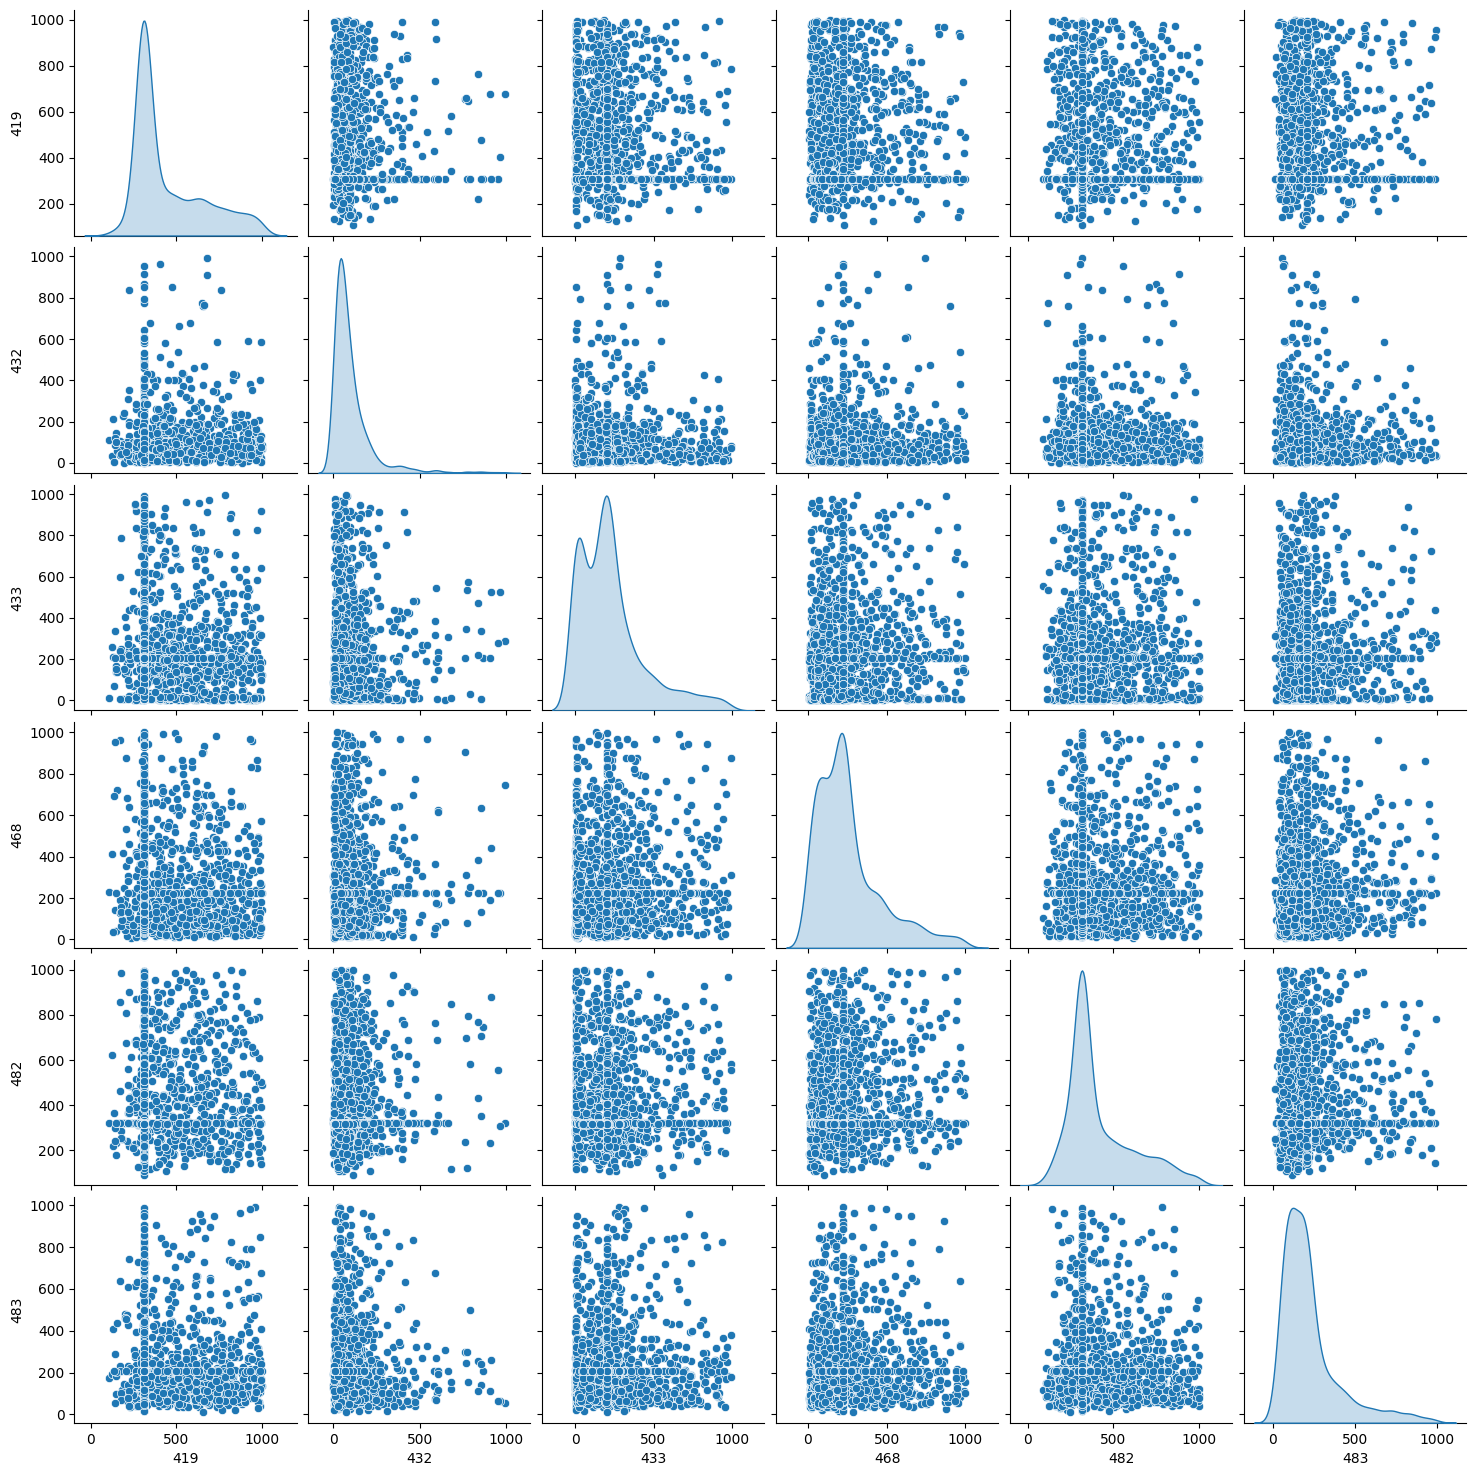

In [141]:
sns.pairplot(sigcln[fcols1], diag_kind='kde')

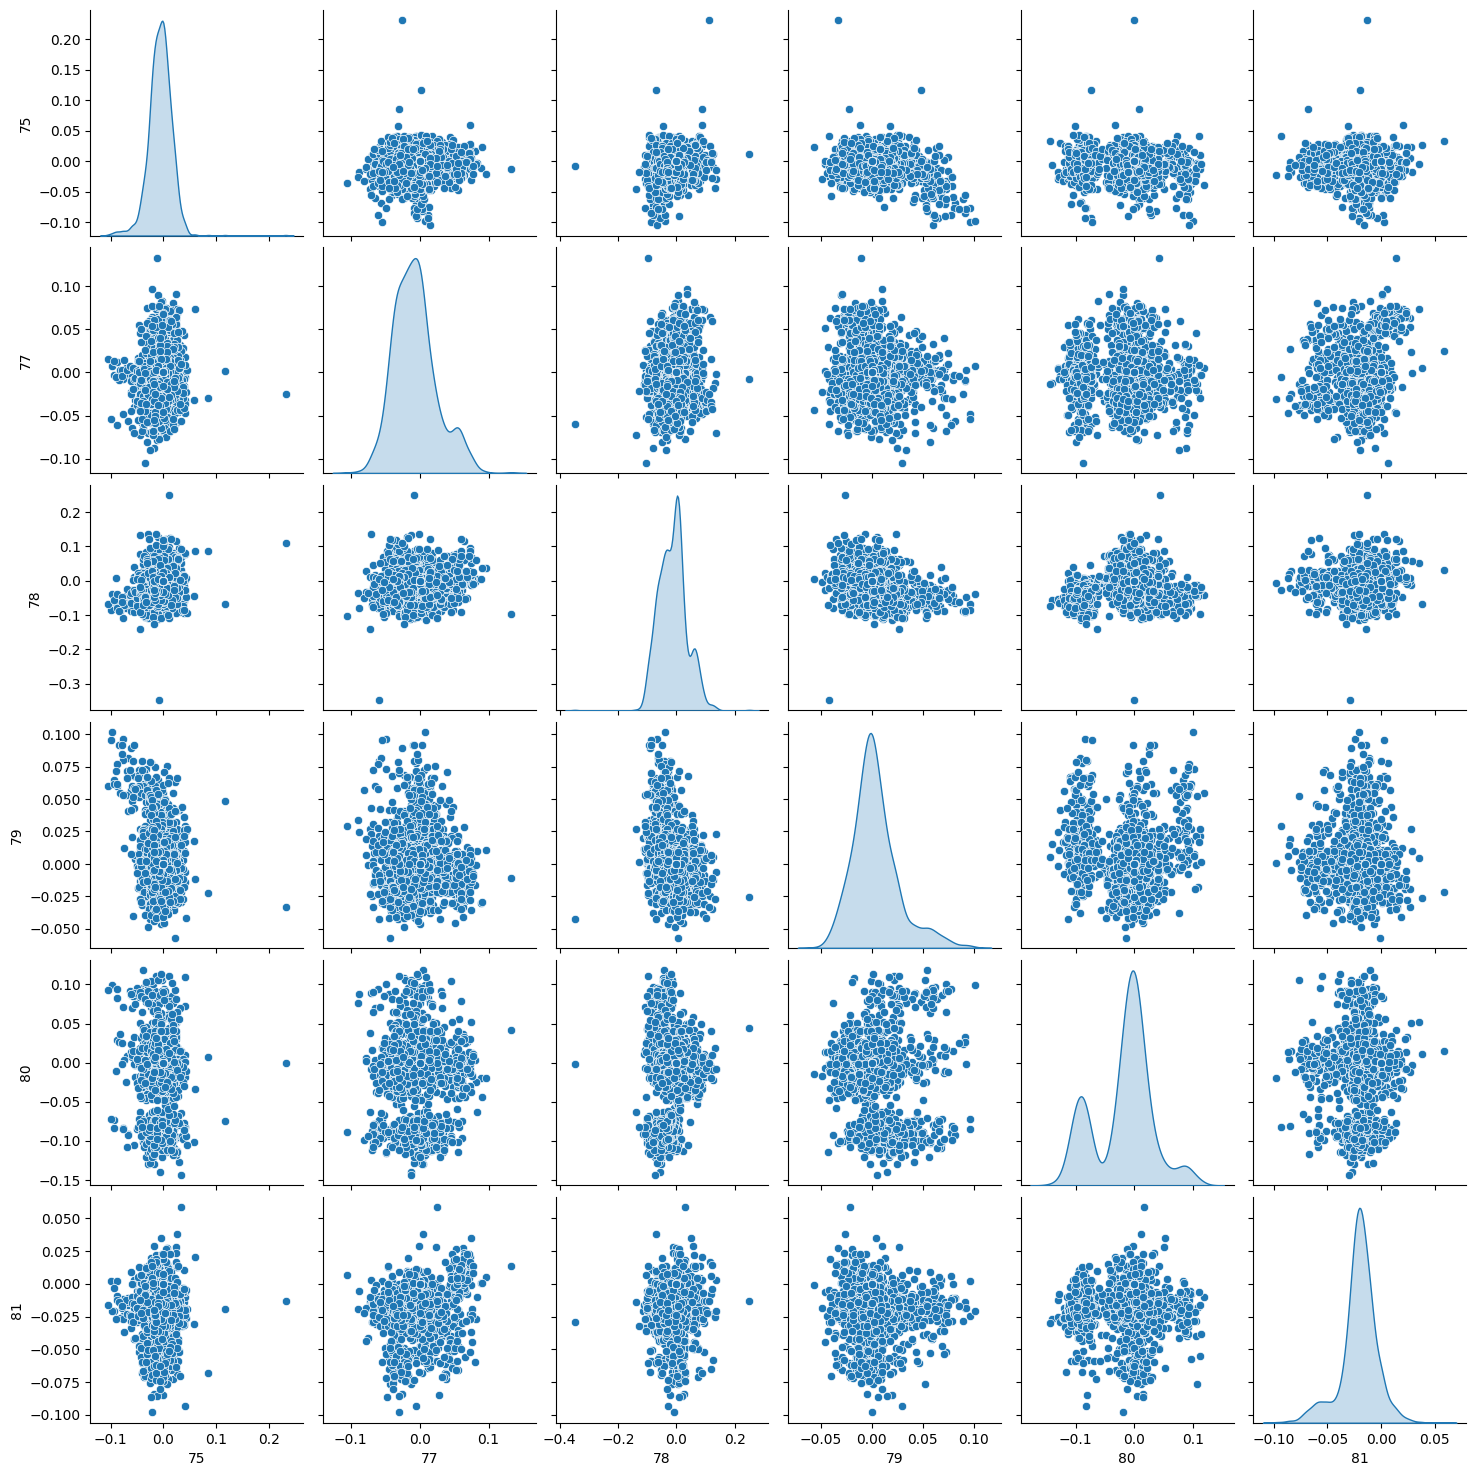

In [142]:
sns.pairplot(sigcln[scols1], diag_kind='kde')

<hr>
<li> As can be seen from the pairplots above, none of the columns are correlated to another
<li> All columns have distributions with a right tail except 488
<hr>

<Axes: xlabel='419', ylabel='432'>

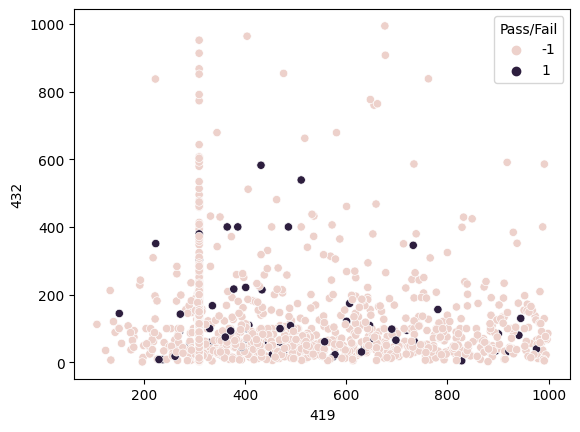

In [143]:
sns.scatterplot(x='419', y='432', data=sigcln, hue='Pass/Fail')

<Axes: xlabel='75', ylabel='77'>

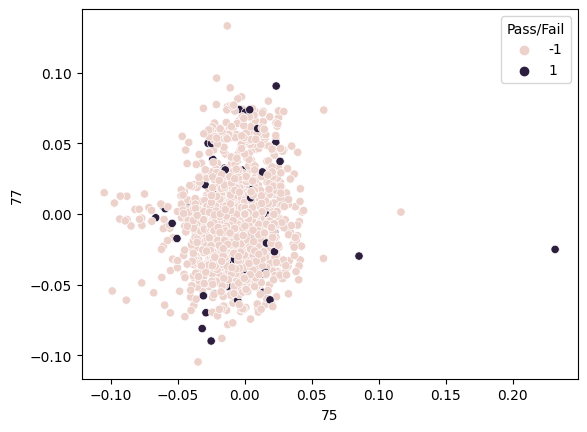

In [144]:
sns.scatterplot(x='75', y='77', data=sigcln, hue='Pass/Fail')

<hr>
<li> Both scatterplots above indicate no correlation which was also visible in the pairplot
<li> Also, show that we have very few data points for Pass/Fail = 1 class which needs to be balanced
<hr>

<hr>

**Section 4 : Data pre-processing: [10 Marks]**
<li>A. Segregate predictors vs target attributes. [2 Marks]
<li>B. Check for target balancing and fix it if found imbalanced. [3 Marks]
<li>C. Perform train-test split and standardise the data or vice versa if required. [3 Marks]
<li>D. Check if the train and test data have similar statistical characteristics when compared with original data. [2 Marks]

<hr>

In [166]:
x = sigcln.iloc[:,:-1]
y = sigcln.iloc[:,-1]

In [167]:
y.value_counts(normalize=True)

-1    0.933631
 1    0.066369
Name: Pass/Fail, dtype: float64

<hr>
93% of the data is for target -1 (Fail) & only 6% data is for Pass (+1). We need to use SMOTE to correct this

<hr>

In [168]:
os = SMOTE()
x, y = os.fit_resample(x, y)

In [169]:
y.value_counts(normalize=True)

-1    0.5
 1    0.5
Name: Pass/Fail, dtype: float64

In [170]:
x.shape

(2926, 30)

<hr>
After SMOTE, the distribution by target class is 50:50 and the number of rows has increased to 2926
<hr>

In [171]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.7)

In [172]:
x_train.shape

(2048, 30)

In [173]:
ss = StandardScaler()
x_trnscl = ss.fit_transform(x_train)
x_tstscl = ss.transform(x_test)

In [174]:
x_trnscl

array([[-0.00247996, -0.15049156,  0.67681951, ..., -1.7651242 ,
        -0.17705055,  2.14031631],
       [-2.39381065, -0.30884034,  0.7249835 , ..., -0.38290651,
         0.46195843, -0.40674711],
       [-0.02547353,  0.27931228, -0.2604593 , ..., -0.22288351,
        -0.4706083 , -0.29645979],
       ...,
       [ 0.38074611, -0.81781857,  0.20391059, ...,  0.57142248,
        -0.50827214, -0.49022868],
       [ 1.15803518, -1.45937833,  0.20541933, ...,  0.00615962,
         0.0632017 ,  0.67220407],
       [-0.10427913,  0.91578668, -1.56524611, ...,  0.51643716,
        -1.13623335,  0.59464689]])

In [175]:
x_train.describe().T

,count,mean,std,min,25%,50%,75%,max
9,2048.0,-0.001768,0.013050,-0.0534,-0.010100,-0.001881,0.005808,0.074900
10,2048.0,0.000531,0.008843,-0.0349,-0.004500,0.000911,0.006132,0.053000
24,2048.0,-410.076035,2606.317816,-13232.5000,-1538.006120,-61.625000,1325.375000,14106.000000
75,2048.0,-0.004886,0.022318,-0.0989,-0.016772,-0.004700,0.006100,0.167838
77,2048.0,-0.006434,0.029624,-0.0898,-0.026819,-0.008256,0.009804,0.133100
78,2048.0,-0.016467,0.044222,-0.1272,-0.050905,-0.018673,0.009299,0.249200
79,2048.0,0.006843,0.022795,-0.0490,-0.008700,0.003462,0.019065,0.096400
80,2048.0,-0.022296,0.049447,-0.1301,-0.068749,-0.010600,0.008904,0.118600
81,2048.0,-0.020821,0.016692,-0.0982,-0.026907,-0.019500,-0.011100,0.058400
82,2048.0,0.006080,0.032086,-0.0771,-0.015962,0.007629,0.026174,0.136500


In [176]:
x_test.describe().T

,count,mean,std,min,25%,50%,75%,max
9,878.0,-0.001629,0.014027,-0.041000,-0.009700,-0.002273,0.006500,0.060900
10,878.0,0.000401,0.008519,-0.032400,-0.004993,0.001193,0.006000,0.029300
24,878.0,-365.363239,2594.483118,-14804.500000,-1512.801413,-54.125000,1351.062500,13880.000000
75,878.0,-0.005200,0.025989,-0.104900,-0.018118,-0.004350,0.006651,0.231500
77,878.0,-0.006145,0.030118,-0.104600,-0.027400,-0.007927,0.008900,0.096200
78,878.0,-0.019556,0.045918,-0.348200,-0.053604,-0.018743,0.006274,0.136700
79,878.0,0.006369,0.022028,-0.056800,-0.008284,0.003994,0.018300,0.101300
80,878.0,-0.023791,0.049607,-0.143700,-0.072803,-0.012126,0.008146,0.109300
81,878.0,-0.020383,0.016428,-0.093000,-0.026570,-0.019250,-0.011000,0.038100
82,878.0,0.003896,0.032987,-0.212900,-0.017495,0.004737,0.026247,0.143700


<hr>
The 5 point summaries for x_train and x_test are very similar to the 5 point summary of the original data set
<hr>

<hr>

**Section 4 : Model training, testing and tuning: [20 Marks]**
<li>A. Use any Supervised Learning technique to train a model. [2 Marks]
<li>B. Use cross validation techniques. [3 Marks]
Hint: Use all CV techniques that you have learnt in the course.
<li>C. Apply hyper-parameter tuning techniques to get the best accuracy. [3 Marks]
Suggestion: Use all possible hyper parameter combinations to extract the best accuracies.
<li>D. Use any other technique/method which can enhance the model performance. [4 Marks]
Hint: Dimensionality reduction, attribute removal, standardisation/normalisation, target balancing etc.
<li>E. Display and explain the classification report in detail. [3 Marks]
<li>F. Apply the above steps for all possible models that you have learnt so far. [5 Marks]

<hr>

In [207]:
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats

In [201]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [254]:
mdl_name = []
trn_acc = []
tst_acc = []

<hr>
Use any Supervised Learning technique to train a model. [2 Marks]
<hr>

In [255]:
xgb = XGBClassifier()
xgb.fit(x_trnscl, y_train)
y_pred = xgb.predict(x_tstscl)
y_trnpred = xgb.predict(x_trnscl)
mdl_name.append('XGBoost Classifier')
trn_acc.append(accuracy_score(y_train, y_trnpred))
tst_acc.append(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       446
           1       0.98      0.98      0.98       432

    accuracy                           0.98       878
   macro avg       0.98      0.98      0.98       878
weighted avg       0.98      0.98      0.98       878



<hr>
Use cross validation techniques. [3 Marks] Hint: Use all CV techniques that you have learnt in the course.
<hr>

In [195]:
# K-Fold Cross Validation

k = 5
kf = KFold(n_splits=k, random_state=None)
model = XGBClassifier()

acc_score = []

for train_index , val_index in kf.split(x_trnscl):
    xtrn , xval = x_trnscl[train_index,:],x_trnscl[val_index,:]
    ytrn , yval = y_train[train_index], y_train[val_index]

    model.fit(xtrn,ytrn)
    pred_values = model.predict(xval)

    acc = accuracy_score(pred_values , yval)
    acc_score.append(acc)

avg_acc_score = sum(acc_score)/k

print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.9609756097560975, 0.9682926829268292, 0.9707317073170731, 0.960880195599022, 0.960880195599022]
Avg accuracy : 0.9643520782396088


In [ ]:
# Leave One Out Cross Validation

# Code is similar to KFold, however it is taking long given the size of the data
# Have excluded it from the execution

# loocv = LeaveOneOut()
# model = XGBClassifier()

# acc_score = []

# for train_index , val_index in loocv.split(x_trnscl):
#    xtrn , xval = x_trnscl[train_index,:],x_trnscl[val_index,:]
#    ytrn , yval = y_train[train_index], y_train[val_index]
#
#   model.fit(xtrn,ytrn)
#    pred_values = model.predict(xval)
#
#    acc = accuracy_score(pred_values , yval)
#    acc_score.append(acc)

# avg_acc_score = sum(acc_score)/k

# print('accuracy of each fold - {}'.format(acc_score))
# print('Avg accuracy : {}'.format(avg_acc_score))

<hr>
Apply hyper-parameter tuning techniques to get the best accuracy. [3 Marks] <br> Suggestion: Use all possible hyper parameter combinations to extract the best accuracies.
<hr>

In [208]:
clf_xgb = XGBClassifier(objective = 'binary:logistic')
param_dist = {'n_estimators': stats.randint(150, 1000),
              'learning_rate': stats.uniform(0.01, 0.6),
              'subsample': stats.uniform(0.3, 0.9),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': stats.uniform(0.5, 0.9),
              'min_child_weight': [1, 2, 3, 4]
             }

In [213]:
numFolds = 5
kfold_5 = KFold(shuffle = True, n_splits = numFolds)

In [214]:
clf = RandomizedSearchCV(clf_xgb,
                         param_distributions = param_dist,
                         cv = kfold_5,
                         n_iter = 5, # you want 5 here not 25 if I understand you correctly
                         scoring = 'roc_auc',
                         error_score = 0,
                         verbose = 3,
                         n_jobs = -1)


In [215]:
clf.fit(x_trnscl, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
                   error_score=0,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           im...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7821cdfcb9a0>,
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9],
                                        'min_child_weight': [1, 2, 3, 4],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7821cdf9a1a0>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7821d212c0d0>},
                   scoring='roc_auc', verbose=3)

In [217]:
clf_best = clf.best_estimator_

In [256]:
y_pred = clf_best.predict(x_tstscl)
y_trnpred = clf_best.predict(x_trnscl)
mdl_name.append('XGBoost Best Params')
trn_acc.append(accuracy_score(y_train, y_trnpred))
tst_acc.append(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       446
           1       0.98      0.96      0.97       432

    accuracy                           0.97       878
   macro avg       0.97      0.97      0.97       878
weighted avg       0.97      0.97      0.97       878



<hr>
Use any other technique/method which can enhance the model performance. [4 Marks]<br>
Hint: Dimensionality reduction, attribute removal, standardisation/normalisation, target balancing etc
<hr>

In [232]:
# Attribute Removal, Standardisation, Target Balancing have already been done above
# Will use Dimensionality Reduction

from sklearn.decomposition import PCA
pca = PCA(n_components=30)

In [233]:
xpca = pca.fit_transform(x_trnscl)
xtstpca = pca.transform(x_tstscl)

In [238]:
df_pca1 = pd.DataFrame(xpca,
                       columns=['PC{}'.
                       format(i+1)
                        for i in range(30)])
df_pca1.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
0,1.801320,1.278944,1.832612,-0.944877,-0.120211,-0.783433,0.435098,-0.826581,-0.878553,-0.199537,...,-1.128524,-0.809675,-0.270000,0.803505,0.187823,0.474818,0.146603,-0.128404,-0.509565,0.125360
1,1.182172,0.481020,0.392501,-0.791324,-0.724493,1.148335,-1.305507,0.694307,0.713746,0.488820,...,-1.452909,-1.148965,-1.235961,-0.910978,-1.364719,1.531736,0.728868,0.102403,0.135454,-0.008490
2,-1.163609,0.589135,-0.959245,-0.380432,0.714433,-0.474912,0.134906,-0.203678,1.487215,-0.844125,...,0.235642,-2.049735,1.505101,-0.489300,-0.584024,-0.849846,0.412981,-0.365095,0.219483,-1.274159
3,0.867653,0.692382,-1.113588,-1.315135,0.221064,-1.326974,0.246875,0.148134,0.498991,-0.553722,...,-0.778129,0.673915,0.426036,-0.212470,0.150814,0.296899,-0.490073,0.113391,0.139745,-0.238585
4,-0.845933,0.627211,0.516606,0.067841,1.754909,0.396051,-2.987373,1.633845,1.591340,-0.868764,...,-0.420831,0.855276,-1.921288,2.922536,1.076119,-0.520434,0.020264,-0.120761,-0.232988,-0.881731


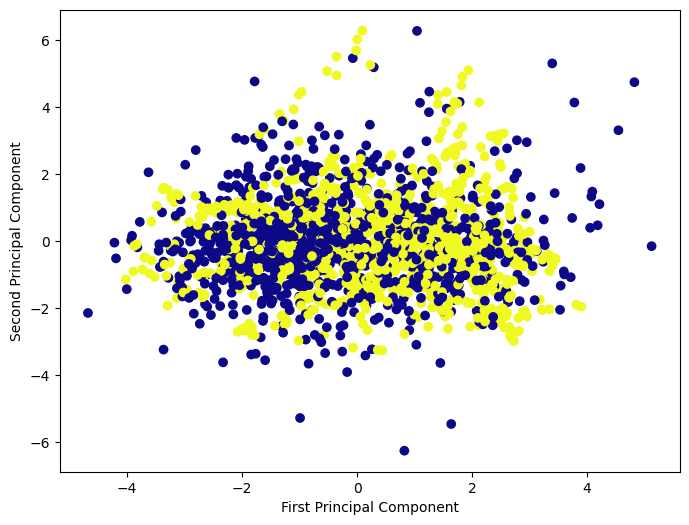

In [239]:
# giving a larger plot
plt.figure(figsize=(8, 6))

plt.scatter(xpca[:, 0], xpca[:, 1],
            c=y_train,
            cmap='plasma')

# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [257]:
modelpca = XGBClassifier()
modelpca.fit(xpca, y_train)
y_pred = modelpca.predict(xtstpca)
y_trnpred = modelpca.predict(xpca)
mdl_name.append('XGBoost with PCA')
trn_acc.append(accuracy_score(y_train, y_trnpred))
tst_acc.append(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.92      0.96       446
           1       0.92      0.99      0.96       432

    accuracy                           0.96       878
   macro avg       0.96      0.96      0.96       878
weighted avg       0.96      0.96      0.96       878



<hr>

<li> Overall, the accuracy of the base XGB model without any tuning was the best at 97.8%. Precision & Recall for this model were 98% - The model is doing well & is not making many false positive predictions <br><br>

<li> After tuning hyperparameters & finding the best parameters using RandomizedSearchCV, the accuracy reduced to 97.03. Precision for class -1 (pass) reduced which indicates it is predicting more false positives - this will lead to more failures <br><br>

<li> Using PCA with only 30 components resulted in an accuracy of 95.67. Recall is lower (92%) for '0' (pass) class which means it will wrongly classify some pass as fail ( higher false negatives )

<hr>



<hr>
Apply the above steps for all possible models that you have learnt so far
<hr>

In [241]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [242]:
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
lr = LogisticRegression()
svc = SVC()

In [258]:
dtc.fit(x_trnscl, y_train)
y_pred = dtc.predict(x_tstscl)
y_trnpred = dtc.predict(x_trnscl)
mdl_name.append('Decision Tree')
trn_acc.append(accuracy_score(y_train, y_trnpred))
tst_acc.append(accuracy_score(y_test, y_pred))
print('Decision Tree Classifier')
print('-------------------------------------------')
print(classification_report(y_test, y_pred))

Decision Tree Classifier
-------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       446
           1       0.90      0.92      0.91       432

    accuracy                           0.91       878
   macro avg       0.91      0.91      0.91       878
weighted avg       0.91      0.91      0.91       878



In [259]:
rfc.fit(x_trnscl, y_train)
y_pred = rfc.predict(x_tstscl)
y_trnpred = rfc.predict(x_trnscl)
mdl_name.append('Random Forest Classifier')
trn_acc.append(accuracy_score(y_train, y_trnpred))
tst_acc.append(accuracy_score(y_test, y_pred))
print('Random Forest Classifier')
print('-------------------------------------------')
print(classification_report(y_test, y_pred))

Random Forest Classifier
-------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       446
           1       0.97      0.97      0.97       432

    accuracy                           0.97       878
   macro avg       0.97      0.97      0.97       878
weighted avg       0.97      0.97      0.97       878



In [260]:
lr.fit(x_trnscl, y_train)
y_pred = lr.predict(x_tstscl)
y_trnpred = lr.predict(x_trnscl)
mdl_name.append('Logistic Regression')
trn_acc.append(accuracy_score(y_train, y_trnpred))
tst_acc.append(accuracy_score(y_test, y_pred))
print('Logistic Regression Classifier')
print('-------------------------------------------')
print(classification_report(y_test, y_pred))

Logistic Regression Classifier
-------------------------------------------
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       446
           1       0.67      0.72      0.69       432

    accuracy                           0.69       878
   macro avg       0.69      0.69      0.69       878
weighted avg       0.69      0.69      0.69       878



In [261]:
svc.fit(x_trnscl, y_train)
y_pred = svc.predict(x_tstscl)
y_trnpred = svc.predict(x_trnscl)
mdl_name.append('Support Vector Classifier')
trn_acc.append(accuracy_score(y_train, y_trnpred))
tst_acc.append(accuracy_score(y_test, y_pred))
print('Support Vector Classifier')
print('-------------------------------------------')
print('Accuracy :', accuracy_score(y_test, y_pred))
print('-------------------------------------------')
print(classification_report(y_test, y_pred))

Support Vector Classifier
-------------------------------------------
Accuracy : 0.94874715261959
-------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       446
           1       0.91      0.99      0.95       432

    accuracy                           0.95       878
   macro avg       0.95      0.95      0.95       878
weighted avg       0.95      0.95      0.95       878



<hr>
<li>Tested with multiple classifier models - Decision Tree, Random Forest, Logistic Regression, Support Vector. Of these 4 models, Random Forest performs the best with an accuracy of 97.26

<hr>

<hr>

**Section 6 : Post Training and Conclusion: [5 Marks]**
<li>A. Display and compare all the models designed with their train and test accuracies. [1 Marks]
<li>B. Select the final best trained model along with your detailed comments for selecting this model. [1 Marks]
<li>C. Pickle the selected model for future use. [2 Marks]
<li>D. Write your conclusion on the results. [1 Marks

<hr>

In [264]:
pd.DataFrame({'Model': mdl_name, 'Train Accuracy': trn_acc, 'Test Accuracy': tst_acc})

,Model,Train Accuracy,Test Accuracy
0,XGBoost Classifier,1.000000,0.978360
1,XGBoost Best Params,1.000000,0.970387
2,XGBoost with PCA,1.000000,0.956720
3,Decision Tree,1.000000,0.906606
4,Random Forest Classifier,1.000000,0.971526
5,Logistic Regression,0.694336,0.686788
6,Support Vector Classifier,0.976074,0.948747


<hr>

<li>Overall, XGBClassifier with its default hyper parameters performed the best with 98.7% accuracy and should be the model to use for production

<li>The model has the highest accuracy and also 98% recall and precision which will enable this model to perform well on unseen data

<hr>

In [265]:
import pickle
filename = 'final_model.pkl'
pickle.dump(xgb, open(filename, 'wb'))